
# House Prices Prediction Model
This notebook implements a machine learning pipeline to predict house prices in Ames, Iowa.

## 1. Data Loading and Initial Exploration

# House Prices Prediction Model
This notebook implements a machine learning pipeline to predict house prices in Ames, Iowa.

## 1. Data Loading and Initial Exploration

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_log_error

# Load the datasets
train_data = pd.read_csv('/Users/nasibamammadli/pw1/notebooks/data/train.csv')
test_data = pd.read_csv('/Users/nasibamammadli/pw1/notebooks/data/test.csv')

# Display basic information
print("Training set shape:", train_data.shape)
print("\nTest set shape:", test_data.shape)
print("\nFirst 5 rows of training data:")
display(train_data.head())

Training set shape: (1460, 81)

Test set shape: (1459, 80)

First 5 rows of training data:


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## 2. Feature Selection and Analysis

In [3]:
# Select features
continuous_features = ['GrLivArea', 'TotalBsmtSF']
categorical_features = ['Neighborhood', 'HouseStyle']

# Display selected features information
print("\nSelected features summary:")
for feature in continuous_features:
    print(f"\n{feature} statistics:")
    display(train_data[feature].describe())

print("\nCategorical features value counts:")
for feature in categorical_features:
    print(f"\n{feature} distribution:")
    display(train_data[feature].value_counts().head())


Selected features summary:

GrLivArea statistics:


count    1460.000000
mean     1515.463699
std       525.480383
min       334.000000
25%      1129.500000
50%      1464.000000
75%      1776.750000
max      5642.000000
Name: GrLivArea, dtype: float64


TotalBsmtSF statistics:


count    1460.000000
mean     1057.429452
std       438.705324
min         0.000000
25%       795.750000
50%       991.500000
75%      1298.250000
max      6110.000000
Name: TotalBsmtSF, dtype: float64


Categorical features value counts:

Neighborhood distribution:


Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Name: count, dtype: int64


HouseStyle distribution:


HouseStyle
1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
Name: count, dtype: int64

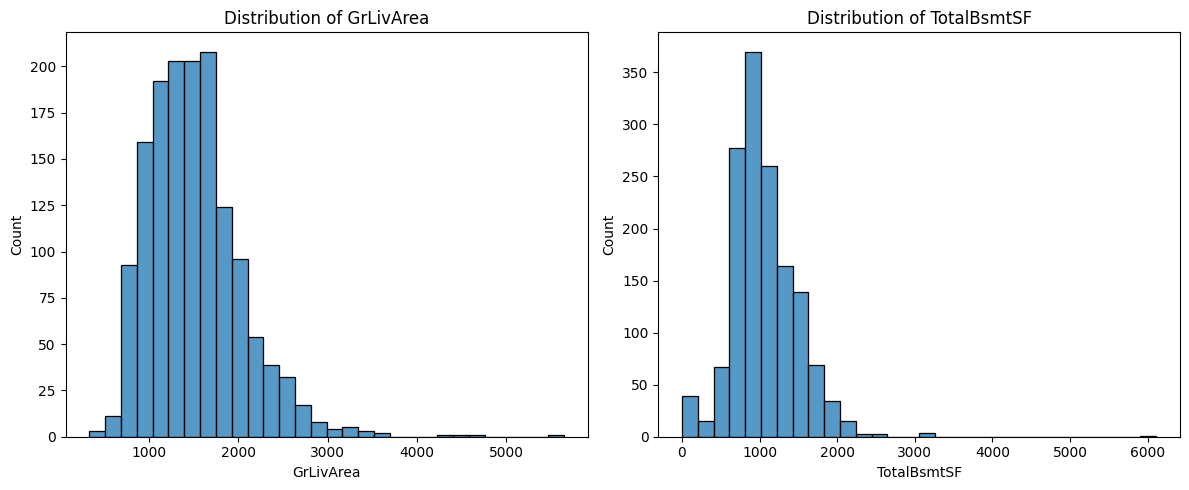

In [4]:
# Visualize continuous features
plt.figure(figsize=(12, 5))
for i, feature in enumerate(continuous_features, 1):
    plt.subplot(1, 2, i)
    sns.histplot(train_data[feature], bins=30)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

## 3. Feature Processing

In [6]:
# Create feature matrix X and target variable y
X = train_data[continuous_features + categorical_features].copy()
y = train_data['SalePrice']

print("Initial data shapes:")
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nAfter train-test split:")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

# Scale continuous features
scaler = StandardScaler()
X_train_continuous = scaler.fit_transform(X_train[continuous_features])
X_test_continuous = scaler.transform(X_test[continuous_features])

print("\nAfter scaling continuous features:")
print(f"X_train_continuous shape: {X_train_continuous.shape}")
print(f"X_test_continuous shape: {X_test_continuous.shape}")

# Encode categorical features
encoders = {}
X_train_categorical = X_train[categorical_features].copy()
X_test_categorical = X_test[categorical_features].copy()

for feature in categorical_features:
    encoders[feature] = LabelEncoder()
    X_train_categorical[feature] = encoders[feature].fit_transform(X_train_categorical[feature])
    X_test_categorical[feature] = encoders[feature].transform(X_test_categorical[feature])

print("\nAfter encoding categorical features:")
print(f"X_train_categorical shape: {X_train_categorical.shape}")
print(f"X_test_categorical shape: {X_test_categorical.shape}")

# Combine processed features
X_train_processed = np.hstack([X_train_continuous, X_train_categorical])
X_test_processed = np.hstack([X_test_continuous, X_test_categorical])

print("\nFinal processed data shapes:")
print(f"X_train_processed shape: {X_train_processed.shape}")
print(f"X_test_processed shape: {X_test_processed.shape}")

# Display sample of processed data
print("\nSample of processed training data (first 5 rows):")
print("Columns order:", continuous_features + categorical_features)
print(X_train_processed[:5])

Initial data shapes:
X shape: (1460, 4)
y shape: (1460,)

After train-test split:
X_train shape: (1168, 4)
X_test shape: (292, 4)
y_train shape: (1168,)
y_test shape: (292,)

After scaling continuous features:
X_train_continuous shape: (1168, 2)
X_test_continuous shape: (292, 2)

After encoding categorical features:
X_train_categorical shape: (1168, 2)
X_test_categorical shape: (292, 2)

Final processed data shapes:
X_train_processed shape: (1168, 4)
X_test_processed shape: (292, 4)

Sample of processed training data (first 5 rows):
Columns order: ['GrLivArea', 'TotalBsmtSF', 'Neighborhood', 'HouseStyle']
[[-0.40709315  0.57261219 12.          2.        ]
 [ 0.08317013 -0.59654659  8.          5.        ]
 [-1.39525026 -0.60335723  7.          2.        ]
 [ 0.45897505 -0.75092096 18.          0.        ]
 [ 0.31208684 -0.08120864 18.          0.        ]]


## 4. Model Training and Evaluation

In [7]:
def compute_rmsle(y_test: np.ndarray, y_pred: np.ndarray, precision: int = 2) -> float:
    rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred))
    return round(rmsle, precision)

# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_processed, y_train)

# Make predictions
y_pred = model.predict(X_test_processed)

# Calculate RMSLE
rmsle_score = compute_rmsle(y_test, y_pred)
print(f"\nModel RMSLE score: {rmsle_score}")


Model RMSLE score: 0.2


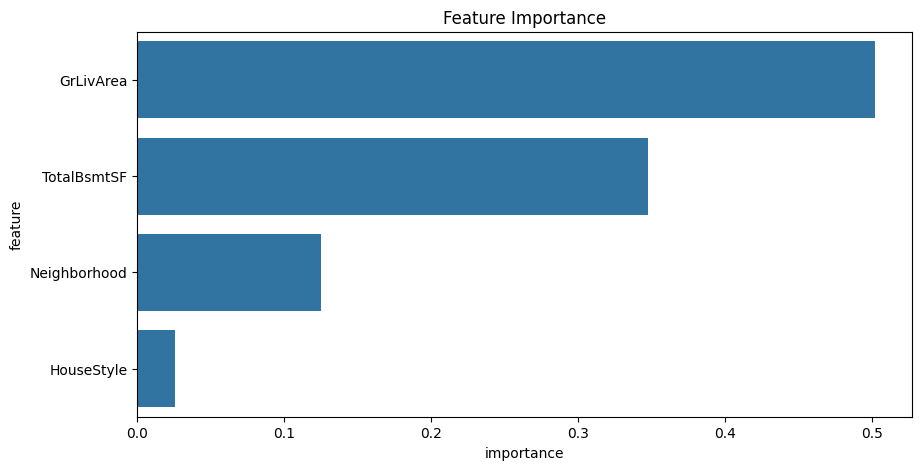

In [8]:
# Feature importance visualization
feature_importance = pd.DataFrame({
    'feature': continuous_features + categorical_features,
    'importance': model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(data=feature_importance, x='importance', y='feature')
plt.title('Feature Importance')
plt.show()

## 5. Model Prediction on Test Set

In [12]:
# Prepare test data
X_test_final = test_data[continuous_features + categorical_features].copy()

# Scale continuous features
X_test_final_continuous = scaler.transform(X_test_final[continuous_features])

# Encode categorical features
X_test_final_categorical = X_test_final[categorical_features].copy()
for feature in categorical_features:
    X_test_final_categorical[feature] = encoders[feature].transform(X_test_final_categorical[feature])

# Combine processed features
X_test_final_processed = np.hstack([X_test_final_continuous, X_test_final_categorical])

# Make predictions
test_predictions = model.predict(X_test_final_processed)

# Create submission file
submission = pd.DataFrame({
    'Id': test_data['Id'],
    'SalePrice': test_predictions
})

print("\nFirst few rows of predictions:")
display(submission.head())

# Save submission
submission.to_csv('/Users/nasibamammadli/pw1/notebooks/submissions/submission.csv', index=False)


First few rows of predictions:


,Id,SalePrice
0,1461,116683.593221
1,1462,151647.000000
2,1463,177923.000000
3,1464,179128.000000
4,1465,202102.240000
